In [ ]:

import json
import requests
import numpy as np
import pandas as pd
from keras.models import Sequential

#nous importons le package json en script Python. Le texte en JSON est fait via une chaîne entre guillemets qui contient la valeur dans le mappage clé-valeur dans { }.

all_close_prices = 'https://min-api.cryptocompare.com/data/histoday'
Requeste_data = requests.get(all_close_prices + '?fsym=BTC&tsym=EUR&limit=2000')
histoy_data = pd.DataFrame(json.loads(Requeste_data.content)['Data'])
histoy_data = histoy_data.set_index('time')
histoy_data.index = pd.to_datetime(histoy_data.index, unit='s')

# crée une colonne cible
close_prices_target = 'close'
# maj API, suppression des 2 colonnes string
histoy_data = histoy_data.drop(['conversionType','conversionSymbol'], axis=1)

histoy_data

histoy_data.head(6)

# get the number of trading days 
histoy_data.shape

import matplotlib.pyplot as plt
plt.style.use('bmh')

#visualise the close price data 
plt.figure(figsize=(16,8))
plt.title('bitcion closer price')
plt.xlabel('days')
plt.ylabel('close price EURO (€)')
plt.plot(histoy_data['close'])
plt.show()

# get the close price 
close_price=histoy_data[['close']]
close_price.head(4)

close_price.tail(4)

#creating a varaible to predicte 'x' days out into the future 
future_days = 25
# creating a new column (target) shiftes 'x' units/days up 
histoy_data['prediction']= histoy_data[['close']].shift(-future_days)
histoy_data.tail(4)

#create the feature data set (x) and convert it to a numpy array and the last 'x' rows/ days
X = np.array(histoy_data.drop(['prediction'], 1))[:-future_days]
print(X)

#create the target data set (y) and convert it to a numpy arr y and get  all the target values expectthe laste x raws /days
y = np.array(histoy_data['prediction'])[:-future_days]
print (y)

from sklearn.model_selection import train_test_split

#split the data  into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X ,y, test_size =0.25)

#create the models 
#crete the decision tree regresseor model 
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(x_train, y_train)
#creating the linear regression model

from sklearn.linear_model import LinearRegression
# creation the linear regression model 
linear_regression = LinearRegression().fit(x_train, y_train)

# get the last 'x' rows of the feature data set 
x_future = histoy_data.drop(['prediction'], 1)[:-future_days]# all the rows expccte the laste x rows
x_future = x_future.tail(future_days)# get the last x rows of data set of the future data set  
x_future = np.array(x_future) # convert to np.array 
x_future

# show th e model tree prediction 
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# show the model linear regression prediction 
linear_prediction = linear_regression.predict(x_future)
print(linear_prediction)

#visualise the data 
predictions = tree_prediction

valid_data = histoy_data[X.shape[0]:]
valid_data ['predictions']= predictions  
plt.figure(figsize =(16, 8))
plt.title('Model prediction')
plt.xlabel ('Days')
plt.ylabel ('close price EURO (€)')
plt.plot(histoy_data['close']) 
plt.plot(valid_data [['close', 'predictions']])
plt.legend(['org', 'val', 'pred'])
plt.show()

In [ ]:


import json
import requests
import numpy as np
import pandas as pd
from keras.models import Sequential

In [ ]:
#nous importons le package json en script Python. Le texte en JSON est fait via une chaîne entre guillemets qui contient la valeur dans le mappage clé-valeur dans { }.

In [ ]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=EUR&limit=2000')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')

# crée une colonne cible
target_col = 'close'
# maj API, suppression des 2 colonnes string
hist = hist.drop(['conversionType','conversionSymbol'], axis=1)


In [ ]:
hist 

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2016-07-08,608.51,576.10,581.37,7201.60,4.265109e+06,606.77
2016-07-09,609.31,563.10,606.77,8125.44,4.797673e+06,595.04
2016-07-10,594.32,581.96,595.04,2556.09,1.502485e+06,589.18
2016-07-11,596.91,584.09,589.18,5078.33,2.994639e+06,589.05
2016-07-12,611.54,584.85,589.05,8660.68,5.193369e+06,610.55
...,...,...,...,...,...,...
2021-12-25,45265.44,44466.65,44930.25,2676.52,1.203137e+08,44632.24
2021-12-26,45326.21,43760.17,44632.24,3826.45,1.699132e+08,44885.80
2021-12-27,45978.79,44609.46,44885.80,5300.64,2.396813e+08,44771.79


In [ ]:
hist.head(6)

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2016-07-08,608.51,576.10,581.37,7201.60,4265109.03,606.77
2016-07-09,609.31,563.10,606.77,8125.44,4797673.18,595.04
2016-07-10,594.32,581.96,595.04,2556.09,1502485.18,589.18
2016-07-11,596.91,584.09,589.18,5078.33,2994639.22,589.05
2016-07-12,611.54,584.85,589.05,8660.68,5193369.08,610.55
2016-07-13,611.04,594.66,610.55,5695.30,3427619.57,598.04


In [ ]:
# get the number of trading days 
hist.shape

(2001, 6)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

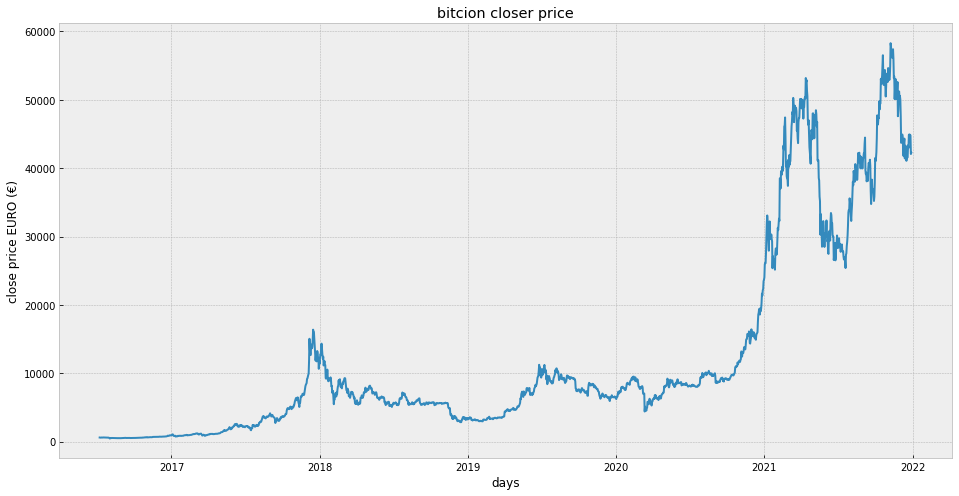

In [ ]:
#visualise the close price data 
plt.figure(figsize=(16,8))
plt.title('bitcion closer price')
plt.xlabel('days')
plt.ylabel('close price EURO (€)')
plt.plot(hist['close'])
plt.show()

In [ ]:
# get the close price 
close_price=hist[['close']]
close_price.head(4)


,close
time,
2016-07-08,606.77
2016-07-09,595.04
2016-07-10,589.18
2016-07-11,589.05


In [ ]:
close_price.tail(4)

,close
time,
2021-12-26,44885.80
2021-12-27,44771.79
2021-12-28,42063.97
2021-12-29,42260.22


In [ ]:
#creating a varaible to predicte 'x' days out into the future 
future_days = 25
# creating a new column (target) shiftes 'x' units/days up 
hist['prediction']= hist[['close']].shift(-future_days)
hist.tail(4)

,high,low,open,volumefrom,volumeto,close,prediction
time,,,,,,,
2021-12-26,45326.21,43760.17,44632.24,3826.45,1.699132e+08,44885.80,NaN
2021-12-27,45978.79,44609.46,44885.80,5300.64,2.396813e+08,44771.79,NaN
2021-12-28,44785.42,41894.44,44771.79,7856.68,3.389447e+08,42063.97,NaN
2021-12-29,42266.02,42002.47,42063.97,69.27,2.917971e+06,42260.22,NaN


In [ ]:
#create the feature data set (x) and convert it to a numpy array and the last 'x' rows/ days
X = np.array(hist.drop(['prediction'], 1))[:-future_days]
print(X)

[[6.08510000e+02 5.76100000e+02 5.81370000e+02 7.20160000e+03
  4.26510903e+06 6.06770000e+02]
 [6.09310000e+02 5.63100000e+02 6.06770000e+02 8.12544000e+03
  4.79767318e+06 5.95040000e+02]
 [5.94320000e+02 5.81960000e+02 5.95040000e+02 2.55609000e+03
  1.50248518e+06 5.89180000e+02]
 ...
 [5.06788100e+04 4.93112700e+04 5.05744100e+04 8.63937000e+03
  4.32683933e+08 5.00280800e+04]
 [5.09475100e+04 4.63092100e+04 5.00280800e+04 1.09465800e+04
  5.36675723e+08 4.75389700e+04]
 [4.76879200e+04 3.90856300e+04 4.75389700e+04 2.27293600e+04
  9.72338800e+08 4.37092600e+04]]


In [ ]:
#create the target data set (y) and convert it to a numpy arr y and get  all the target values expectthe laste x raws /days
y = np.array(hist['prediction'])[:-future_days]
print (y)

[  457.19   509.9    524.54 ... 44771.79 42063.97 42260.22]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split the data  into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X ,y, test_size =0.25)

In [ ]:
#create the models 
#crete the decision tree regresseor model 
from sklearn.tree import DecisionTreeRegressor


In [ ]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
#creating the linear regression model 


In [ ]:
from sklearn.linear_model import LinearRegression
# creation the linear regression model 
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
# get the last 'x' rows of the feature data set 
x_future = hist.drop(['prediction'], 1)[:-future_days]# all the rows expccte the laste x rows
x_future = x_future.tail(future_days)# get the last x rows of data set of the future data set  
x_future = np.array(x_future) # convert to np.array 
x_future 

array([[5.96471900e+04, 5.51628500e+04, 5.78071900e+04, 1.18727500e+04,
        6.86325940e+08, 5.66052300e+04],
       [5.72917700e+04, 5.59293300e+04, 5.66052300e+04, 5.92542000e+03,
        3.36004890e+08, 5.67243000e+04],
       [5.72725500e+04, 5.45423600e+04, 5.67243000e+04, 7.15630000e+03,
        4.00070345e+08, 5.61465400e+04],
       [5.69390900e+04, 5.55052000e+04, 5.61465400e+04, 3.36831000e+03,
        1.89169335e+08, 5.64464500e+04],
       [5.73922600e+04, 5.57744400e+04, 5.64464500e+04, 5.22504000e+03,
        2.95262947e+08, 5.73922600e+04],
       [5.79491500e+04, 5.58596400e+04, 5.73922600e+04, 5.93843000e+03,
        3.38078170e+08, 5.60140900e+04],
       [5.60185500e+04, 5.17509300e+04, 5.60140900e+04, 1.40684500e+04,
        7.52411913e+08, 5.31559700e+04],
       [5.38015400e+04, 5.17713100e+04, 5.31559700e+04, 8.00030000e+03,
        4.23509187e+08, 5.34062400e+04],
       [5.38786700e+04, 4.97604800e+04, 5.34062400e+04, 1.11971100e+04,
        5.77876449e+08, 

In [ ]:
# show th e model tree prediction 
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# show the model linear regression prediction 
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[43732.81 44539.73 44919.26 44539.73 44539.73 44919.26 43728.91 44318.5
 41427.73 42987.19 43278.26 53406.24 41074.81 41693.85 41531.63 41590.4
 43331.3  42932.96 44865.34 44930.25 44632.24 44885.8  44771.79 42063.97
 42260.22]

[55685.0019902  55783.43570452 55277.15596568 55167.18813673
 56591.76677352 54547.84885825 52700.2048318  52981.4924553
 48856.3047913  51479.71364945 52342.1420677  50712.9675128
 48922.74241343 50834.58755382 50498.98694738 51957.22334717
 46068.08559303 47623.3473439  50289.61588485 50247.61544024
 49501.72094059 49557.04295254 49611.91549077 46486.88404042
 44067.90467764]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


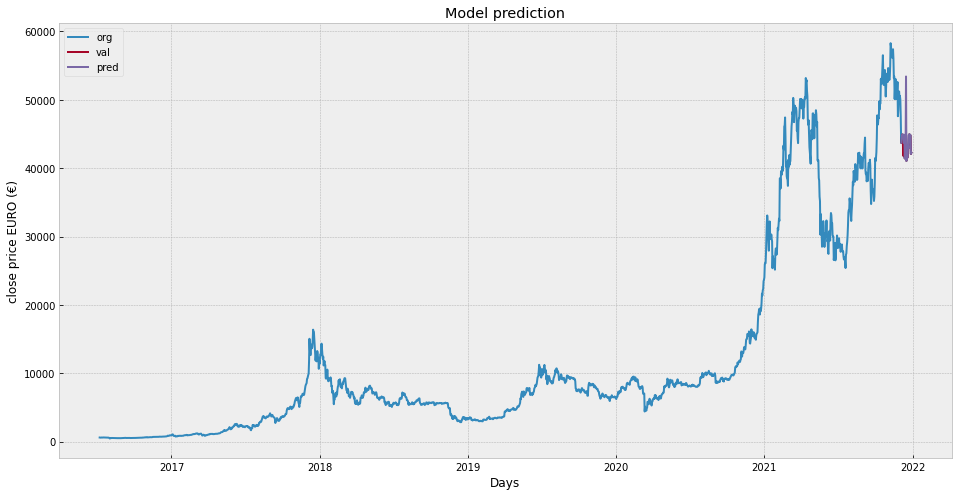

In [ ]:
#visualise the data 
predictions = tree_prediction

valid = hist[X.shape[0]:]
valid ['predictions']= predictions  
plt.figure(figsize =(16, 8))
plt.title('Model prediction')
plt.xlabel ('Days')
plt.ylabel ('close price EURO (€)')
plt.plot(hist['close']) 
plt.plot(valid [['close', 'predictions']])
plt.legend(['org', 'val', 'pred'])
plt.show()